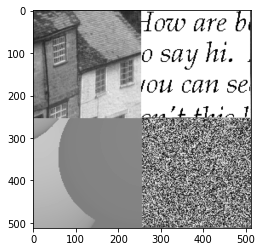

In [70]:
import os 
os.chdir(r"G:\Mi unidad\2021-I\optimizacion\admm-matrix-completion")

from data import load_gif_data
from core.utils import Mask
    
import numpy as np
import matplotlib.pyplot as plt

DATA_DIR = "imgs"
img = load_gif_data(DATA_DIR)[43] / 255

plt.imshow(img, cmap='gray')

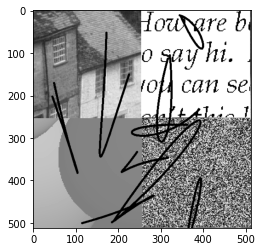

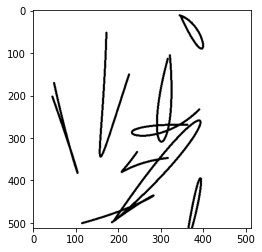

In [71]:
MODE = "irregular"
mask = Mask(mode=MODE, prcnt=0.75)

corrupted , mask =  mask(img)
plt.imshow(corrupted, cmap='gray')
plt.show()

plt.imshow(mask, cmap='gray')
plt.show()

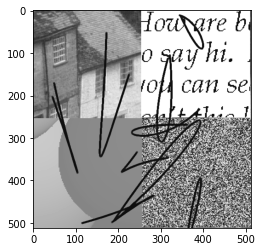

In [72]:
import bm3d

denoised = bm3d.bm3d(corrupted, sigma_psd=np.std(mask), stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)
plt.imshow(denoised*(1-mask)+ corrupted, cmap='gray')

iteration 49 | error 33.32 | psnr 23.73 | ssim 0.91 | time 6.7378


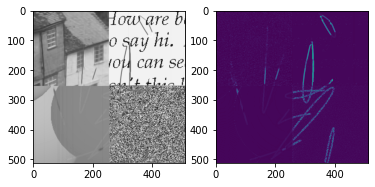

In [73]:
from core.admm import ADMM

admm = ADMM()
estimated = admm.restore(corrupted, mask, sol=img, iters=50)

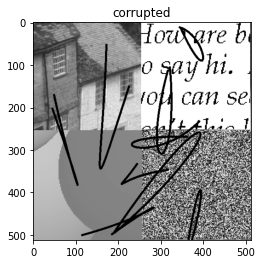

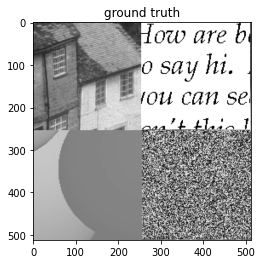

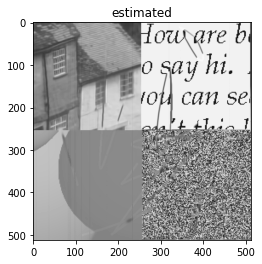

In [74]:
plt.title("corrupted")
plt.imshow(corrupted, cmap='gray')
plt.show()

plt.title("ground truth")
plt.imshow(img, cmap='gray')
plt.show()


plt.title("estimated")
plt.imshow(estimated, cmap='gray')
plt.show()

In [75]:
# ! pip install bm3d
# ! pip install scikit-image